In [1]:
import json
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from evaluation_metrics import get_tokens, get_tokens_bar
from evaluation_metrics import pitch_count_seq, pitch_count_bar, pitch_range_seq, pitch_range_bar
from evaluation_metrics import pitch_intervals, pitch_class_histogram, pitch_class_transition_matrix
from evaluation_metrics import note_count_seq, note_count_bar

import torch
#from transformers import GPT2Config, GPT2Tokenizer, GPT2LMHeadModel, DataCollatorForLanguageModeling, TrainingArguments, Trainer

PATH_PRED = "../3_model/predictions/"
PATH_TOKENS = "../3_model/predictions/tokens/"
PATH_MIDI = "../3_model/predictions/midi/"

In [2]:
from os import walk

# walk through directory and save files and directories
def get_file_and_dirnames(p):
    f = []
    d = []
    for (dirpath, dirnames, filenames) in walk(p):
        f.extend(filenames)
        d.extend(dirnames)
        break
    return f,d

In [3]:
token_files, _ = get_file_and_dirnames(PATH_TOKENS)
_, midi_dirs = get_file_and_dirnames(PATH_MIDI)

In [4]:
example_token_file = token_files[0]
example_token_file

'1_short_small_50.json'

In [5]:
with open(f"{PATH_TOKENS}/{example_token_file}", 'r') as fp:
    tokens = json.load(fp)
token_data = tokens["data"]
token_data

[[0,
  116,
  10,
  40,
  0,
  102,
  13,
  40,
  104,
  13,
  40,
  106,
  13,
  40,
  108,
  10,
  44,
  112,
  8,
  52,
  101,
  116,
  10,
  68,
  101,
  0,
  116,
  8,
  76,
  101,
  0,
  116,
  17,
  44,
  101,
  0,
  103,
  118,
  15,
  44,
  107,
  118,
  13,
  44,
  101,
  108,
  13,
  44,
  112,
  10,
  52,
  101,
  116,
  17,
  52,
  101,
  0,
  102,
  18,
  44,
  101,
  103,
  118,
  20,
  44,
  101,
  104,
  20,
  76,
  101,
  116,
  22,
  44,
  101,
  0,
  103,
  118,
  20,
  44,
  101,
  104,
  119,
  22,
  44,
  108,
  119,
  22,
  68,
  101,
  116,
  119,
  20,
  52,
  101,
  0,
  103,
  118,
  22,
  44,
  101,
  104,
  119,
  20,
  52,
  101,
  108,
  119,
  22,
  44,
  101,
  111,
  22,
  44,
  101,
  112,
  119,
  20,
  52,
  101,
  116,
  119,
  17,
  44,
  101,
  0,
  103,
  118,
  13,
  38,
  103,
  118,
  13,
  44,
  101,
  104,
  119,
  15,
  44,
  101,
  108,
  119,
  15,
  68,
  101,
  115,
  17,
  44,
  101,
  116,
  119,
  17,
  42,
  0,
  104,
  119,
  15,

In [6]:
example_token_seq = token_data[0]
example_token_seq

[0,
 116,
 10,
 40,
 0,
 102,
 13,
 40,
 104,
 13,
 40,
 106,
 13,
 40,
 108,
 10,
 44,
 112,
 8,
 52,
 101,
 116,
 10,
 68,
 101,
 0,
 116,
 8,
 76,
 101,
 0,
 116,
 17,
 44,
 101,
 0,
 103,
 118,
 15,
 44,
 107,
 118,
 13,
 44,
 101,
 108,
 13,
 44,
 112,
 10,
 52,
 101,
 116,
 17,
 52,
 101,
 0,
 102,
 18,
 44,
 101,
 103,
 118,
 20,
 44,
 101,
 104,
 20,
 76,
 101,
 116,
 22,
 44,
 101,
 0,
 103,
 118,
 20,
 44,
 101,
 104,
 119,
 22,
 44,
 108,
 119,
 22,
 68,
 101,
 116,
 119,
 20,
 52,
 101,
 0,
 103,
 118,
 22,
 44,
 101,
 104,
 119,
 20,
 52,
 101,
 108,
 119,
 22,
 44,
 101,
 111,
 22,
 44,
 101,
 112,
 119,
 20,
 52,
 101,
 116,
 119,
 17,
 44,
 101,
 0,
 103,
 118,
 13,
 38,
 103,
 118,
 13,
 44,
 101,
 104,
 119,
 15,
 44,
 101,
 108,
 119,
 15,
 68,
 101,
 115,
 17,
 44,
 101,
 116,
 119,
 17,
 42,
 0,
 104,
 119,
 15,
 44,
 101,
 107,
 8,
 44,
 101,
 108,
 119,
 13,
 44,
 101,
 111,
 118,
 17,
 42,
 115,
 15,
 40,
 116,
 119,
 13,
 40,
 0,
 102,
 15,
 38,
 103,
 17,
 44,

In [7]:
midi_dirs.sort()
midi_dirs

['1_short_small_50',
 '2_short_medium_50',
 '3_short_large_50',
 '4_middle_small_50',
 '5_middle_medium_50',
 '6_middle_large_50',
 '7_long_small_50',
 '8_long_medium_50']

In [8]:
example_midi_dir = midi_dirs[0]
example_midi_dir

'1_short_small_50'

In [9]:
midi_files, _ = get_file_and_dirnames(f"{PATH_MIDI}/{example_midi_dir}")
midi_files.sort()
midi_files

['generated_midi_0.midi',
 'generated_midi_1.midi',
 'generated_midi_2.midi',
 'generated_midi_3.midi',
 'generated_midi_4.midi']

In [10]:
example_midi_file = midi_files[0]
example_midi_file

'generated_midi_0.midi'

In [11]:
example_token_seq[:11]

[0, 116, 10, 40, 0, 102, 13, 40, 104, 13, 40]

## Test evaluation metrics

In [12]:
pitches = get_tokens(example_token_seq, 1, 36)
get_tokens(example_token_seq[:11], 1, 36)

[10, 13, 13]

In [13]:
pitches_bar = get_tokens_bar(example_token_seq, 0, 1, 36)
get_tokens_bar(example_token_seq[:11], 0, 1, 36)

[[10], [13, 13]]

In [14]:
pitch_count_seq(pitches)

8

In [15]:
pitch_counts_bar = pitch_count_bar(pitches_bar)

print(pitch_counts_bar)
print(np.round( np.mean(pitch_counts_bar), 2))

[1, 3, 1, 1, 4, 3, 2, 3, 3, 4, 3, 2, 1, 3, 3]
2.47


In [16]:
pitch_range_seq(pitches)

14

In [17]:
pitch_range_bar(pitches_bar)

[0, 5, 0, 0, 7, 4, 2, 5, 4, 9, 4, 2, 0, 3, 5]

In [18]:
intervals = pitch_intervals(pitches)

print(intervals)
print("avg:", np.round(np.mean(intervals), 2))
print("avg absolute values:", np.round(np.mean(np.abs(intervals)), 2))
print("hist:", np.bincount(np.abs(intervals), minlength=36))

[3, 0, 0, -3, -2, 2, -2, 9, -2, -2, 0, -3, 7, 1, 2, 0, 2, -2, 2, 0, -2, 2, -2, 2, 0, -2, -3, -4, 0, 2, 0, 2, 0, -2, -7, 5, 4, -2, -2, 2, 2, -2, -2, 0, 0, 4, 0, -2, 2, 3, 0, -3, 1, -3, -2, 5]
avg: 0.14
avg absolute values: 2.14
hist: [13  2 26  7  3  2  0  2  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0]


In [19]:
pitch_classes = pitch_class_histogram(pitches)

print(pitch_classes)
pitch_class_count = {}
for i, key in enumerate(["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]):
    pitch_class_count[key] = pitch_classes[i]
print(pitch_class_count)

[13  0  9  0 11  3  0 11  0 10  0  0]
{'C': 13, 'C#': 0, 'D': 9, 'D#': 0, 'E': 11, 'F': 3, 'F#': 0, 'G': 11, 'G#': 0, 'A': 10, 'A#': 0, 'B': 0}


[[6 0 2 0 2 1 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [4 0 1 0 3 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 5 0 2 2 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 3 0 0 2 0 5 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 6 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


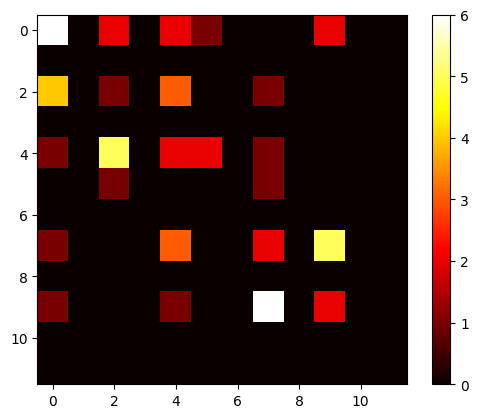

In [20]:
tran_mat = pitch_class_transition_matrix(pitches)

print(tran_mat)
plt.imshow(pitch_class_transition_matrix(pitches), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

In [21]:
note_count_seq(pitches)

57

In [22]:
note_count_bar(pitches_bar)

[1, 6, 1, 1, 5, 4, 4, 6, 6, 6, 6, 4, 1, 3, 3]

In [23]:
positions = get_tokens(example_token_seq, 102, 117)
positions[:10]

[116, 102, 104, 106, 108, 112, 116, 116, 116, 103]